In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

merged_table = pd.merge(ride_data , city_data , on = "city" , how = "left")

# Display the data table for preview

merged_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
#created a new data frame dropping rows  repeated city

minus_duplicated_merged_table = merged_table.drop_duplicates(['city'])
minus_duplicated_merged_table

#new data frame sorted by city name
sorted_by_city_no_duplicates = minus_duplicated_merged_table.sort_values("city") 
sorted_by_city_no_duplicates.head()

,city,date,fare,ride_id,driver_count,type
164,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
68,Barajasview,2018-01-15 02:59:07,19.52,8268107272481,26,Urban
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1655,Bethanyland,2018-04-01 22:04:35,38.71,8221076873967,22,Suburban
2260,Bradshawfurt,2018-03-06 21:44:53,19.74,6080367372860,7,Rural


In [3]:
#Used groupby to calculate average fare and total rides per city. Output series is also sorted alphabetically by city.

per_city_average_fare = merged_table.groupby('city')['fare'].mean()
per_city_total_rides = merged_table.groupby('city')['ride_id'].count()

In [4]:
#Used 2 calculated series and added new columns on sorted dataframe
#Now we have all needed values in the one data frame

sorted_by_city_no_duplicates['average_fare'] = per_city_average_fare.values
sorted_by_city_no_duplicates['total_rides'] = per_city_total_rides.values

#dropped columns not needed for bubble plot

sorted_by_city_no_duplicates = sorted_by_city_no_duplicates.drop(['date', 'fare', 'ride_id'], axis=1)
sorted_by_city_no_duplicates.head()

,city,driver_count,type,average_fare,total_rides
164,Amandaburgh,12,Urban,24.641667,18
68,Barajasview,26,Urban,25.332273,22
1625,Barronchester,11,Suburban,36.422500,16
1655,Bethanyland,22,Suburban,32.956111,18
2260,Bradshawfurt,7,Rural,40.064000,10


In [5]:
#Filetered dataframe and created 3 data frames, one per city type

is_urban =  sorted_by_city_no_duplicates['type']=="Urban"
only_urban = sorted_by_city_no_duplicates[is_urban]

is_suburban =  sorted_by_city_no_duplicates['type']=="Suburban"
only_suburban = sorted_by_city_no_duplicates[is_suburban]

is_rural =  sorted_by_city_no_duplicates['type']=="Rural"
only_rural = sorted_by_city_no_duplicates[is_rural]


## Bubble Plot of Ride Sharing Data

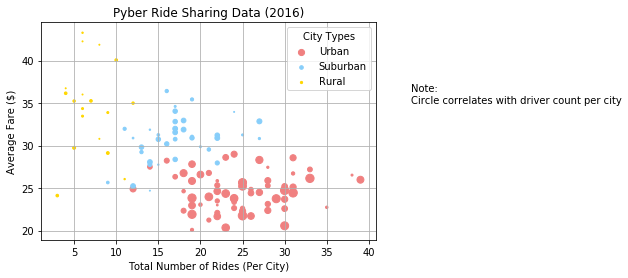

In [6]:
# Obtain the x and y coordinates for each of the three city types

#I can build scatter plots from columns from 3 separate dataframes

# Build the scatter plots for each city types
plt.scatter(only_urban.total_rides, only_urban.average_fare, s=only_urban.driver_count , color='lightcoral' ,label='Urban')

plt.scatter(only_suburban.total_rides, only_suburban.average_fare, s=only_suburban.driver_count , color='lightskyblue' ,label='Suburban')

plt.scatter(only_rural.total_rides, only_rural.average_fare, s=only_rural.driver_count , color='gold' ,label='Rural')


# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()


# Create a legend
plt.legend(title="City Types")

# Incorporate a text label regarding circle size
plt.text(45,35,s="Note:\nCircle correlates with driver count per city")
# Save Figure
plt.savefig('Images/pyber_scatter.png')


plt.show()


## Total Fares by City Type

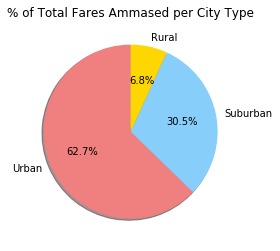

In [7]:
# Calculate total fares per city type to calculate percents
#Using original merged dataframe I can calculate the total ammased fares per city type

per_type_total_fares = merged_table.groupby('type')['fare'].sum()

urban_total_fares = per_type_total_fares[2]
suburban_total_fares = per_type_total_fares[1]
rural_total_fares = per_type_total_fares[0]


# Build Pie Chart

city_types = ["Urban", "Suburban", "Rural"]
type_totals = [urban_total_fares, suburban_total_fares, rural_total_fares]
colors = ["lightcoral", "lightskyblue", "gold"]
plt.pie(type_totals, labels=city_types, colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Fares Ammased per City Type")

plt.savefig('Images/fares_by_type.png')
plt.show()


## Total Rides by City Type

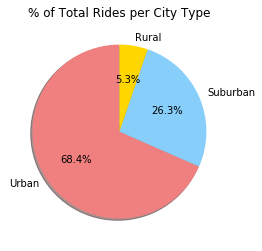

In [9]:
# Calculate number of rides per city type to calculate percents
#Using original merged dataframe I can calculate the number of rides per city type

is_urban =  merged_table['type']=="Urban"
only_urban = merged_table[is_urban]
total_urban_rides = len(only_urban)

is_suburban =  merged_table['type']=="Suburban"
only_suburban = merged_table[is_suburban]
total_suburban_rides = len(only_suburban)

is_rural =  merged_table['type']=="Rural"
only_rural = merged_table[is_rural]
total_rural_rides = len(only_rural)

# Build Pie Chart

city_types = ["Urban", "Suburban", "Rural"]
type_totals = [total_urban_rides, total_suburban_rides, total_rural_rides]
colors = ["lightcoral", "lightskyblue", "gold"]
plt.pie(type_totals, labels=city_types, colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Rides per City Type")

plt.savefig('Images/rides_by_type.png')
plt.show()


## Total Drivers by City Type

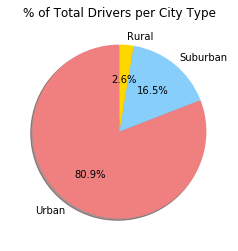

In [10]:
# Calculate total drivers per city type to calculate percents
#Using sorted merged dataframe with no duplicate city rowsI can calculate the total number of per city type

per_type_total_drivers = sorted_by_city_no_duplicates.groupby('type')['driver_count'].sum()

urban_total_drivers = per_type_total_drivers[2]
suburban_total_drivers = per_type_total_drivers[1]
rural_total_drivers = per_type_total_drivers[0]


# Build Pie Charts

city_types = ["Urban", "Suburban", "Rural"]
type_totals = [urban_total_drivers, suburban_total_drivers, rural_total_drivers]
colors = ["lightcoral", "lightskyblue", "gold"]
plt.pie(type_totals, labels=city_types, colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Drivers per City Type")

plt.savefig('Images/drivers_by_type.png')
plt.show()


# Observable Trends

1) As expected Urban cities have more drivers than Suburban , and Suburban more than Rural. (size of bubbles in scatter plot).

2) Total ammassed Fares in Urban cities make up more than half of all ammassed fares (Piechart #1)

3) Urban cities ammount to almost 3/4 of all rides in Pyber Data 2016 (Piechart #2)